
--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB
None

--- First 5 Rows ---
   country  year     sex          age  suicides_no  population
0  Albania  1985  female  15-24 years          NaN    277900.0
1  Albania  1985  female  25-34 years          NaN    246800.0
2  Albania  1985  female  35-54 years          NaN    267500.0
3  Albania  1985  female   5-14 years          NaN    298300.0
4  Albania  1985  female  55-74 years          NaN    138700.0

--- Missing Values ---
country           0
year              0
sex

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/tmp/ipykernel_13/1169716395.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["suicides_no"] = df_clean["suicides_no"].astype(int)
/tmp/ipykernel_13/1169716395.p

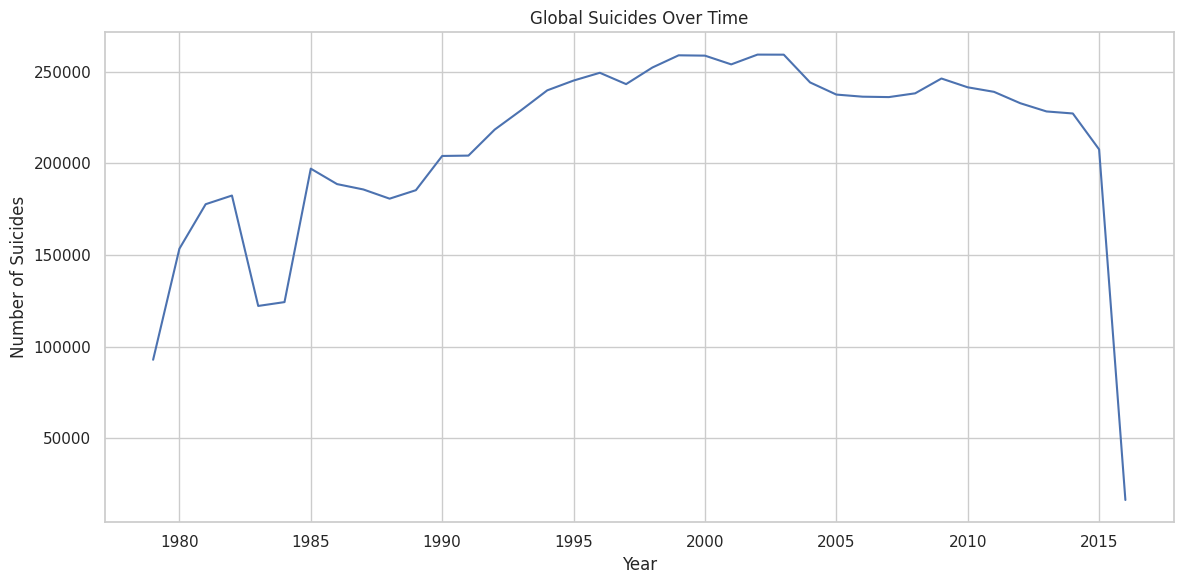

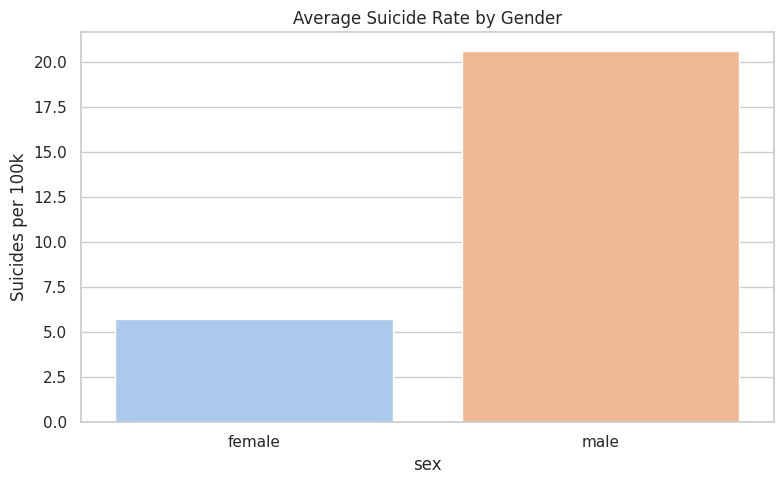

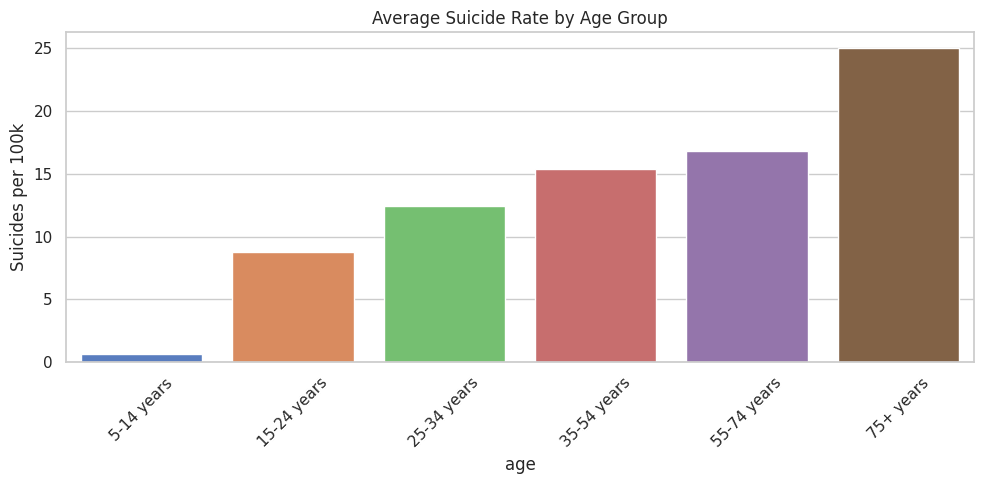

In [1]:
# Global Suicide Analysis | WHO Dataset
# Author: Muhammad Faheem
# Objective: Analyze global suicide trends with statistical and visual methods

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# ------------------------------
# 📥 1. Load Dataset
# ------------------------------
# Dataset path for Kaggle
file_path = "/kaggle/input/who-suicide-dataset/who_suicide_statistics.csv"
df = pd.read_csv(file_path)

# ------------------------------
# 📌 2. Initial Data Overview
# ------------------------------
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- First 5 Rows ---")
print(df.head())

# ------------------------------
# 🧼 3. Missing Values Summary
# ------------------------------
missing = df.isnull().sum()
print("\n--- Missing Values ---")
print(missing)

# ------------------------------
# 🧹 4. Data Cleaning
# ------------------------------
# Drop rows with missing suicides_no or population
df_clean = df.dropna(subset=["suicides_no", "population"])

# Ensure correct data types
df_clean["suicides_no"] = df_clean["suicides_no"].astype(int)
df_clean["population"] = df_clean["population"].astype(int)

# Add suicide rate per 100k column
df_clean["suicide_rate_per_100k"] = df_clean["suicides_no"] / df_clean["population"] * 100000

# ------------------------------
# 📊 5. Exploratory Data Analysis (EDA)
# ------------------------------
# 📈 Global suicide trends over time
plt.figure(figsize=(12, 6))
global_trend = df_clean.groupby("year")["suicides_no"].sum().reset_index()
sns.lineplot(data=global_trend, x="year", y="suicides_no")
plt.title("Global Suicides Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Suicides")
plt.tight_layout()
plt.show()

# 📊 Suicide rate by gender
plt.figure(figsize=(8, 5))
gender_rate = df_clean.groupby("sex")["suicide_rate_per_100k"].mean().reset_index()
sns.barplot(data=gender_rate, x="sex", y="suicide_rate_per_100k", palette="pastel")
plt.title("Average Suicide Rate by Gender")
plt.ylabel("Suicides per 100k")
plt.tight_layout()
plt.show()


# 📊 Suicide rate by age group
plt.figure(figsize=(10, 5))
age_order = ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]
age_rate = df_clean.groupby("age")["suicide_rate_per_100k"].mean().reindex(age_order).reset_index()
sns.barplot(data=age_rate, x="age", y="suicide_rate_per_100k", palette="muted")
plt.title("Average Suicide Rate by Age Group")
plt.xticks(rotation=45)
plt.ylabel("Suicides per 100k")
plt.tight_layout()
plt.show()

In [2]:
from scipy.stats import ttest_ind

# Split data by gender
male_rates = df_clean[df_clean["sex"] == "male"]["suicide_rate_per_100k"]
female_rates = df_clean[df_clean["sex"] == "female"]["suicide_rate_per_100k"]

# Perform t-test
t_stat, p_val = ttest_ind(male_rates, female_rates, equal_var=False)

print("T-test: Male vs Female Suicide Rates")
print(f"T-Statistic = {t_stat:.4f}, P-Value = {p_val:.4f}")

if p_val < 0.05:
    print("✅ Statistically Significant Difference (p < 0.05)")
else:
    print("❌ No Significant Difference")

T-test: Male vs Female Suicide Rates
T-Statistic = 76.5888, P-Value = 0.0000
✅ Statistically Significant Difference (p < 0.05)


In [3]:
from scipy.stats import f_oneway

# Separate suicide rates by age group
age_groups = df_clean["age"].unique()
grouped_data = [df_clean[df_clean["age"] == age]["suicide_rate_per_100k"] for age in age_groups]

# Perform ANOVA
f_stat, p_val = f_oneway(*grouped_data)

print("ANOVA: Suicide Rate by Age Group")
print(f"F-Statistic = {f_stat:.4f}, P-Value = {p_val:.4f}")

if p_val < 0.05:
    print("✅ Significant differences between age groups")
else:
    print("❌ No significant difference between age groups")

ANOVA: Suicide Rate by Age Group
F-Statistic = 1184.7158, P-Value = 0.0000
✅ Significant differences between age groups


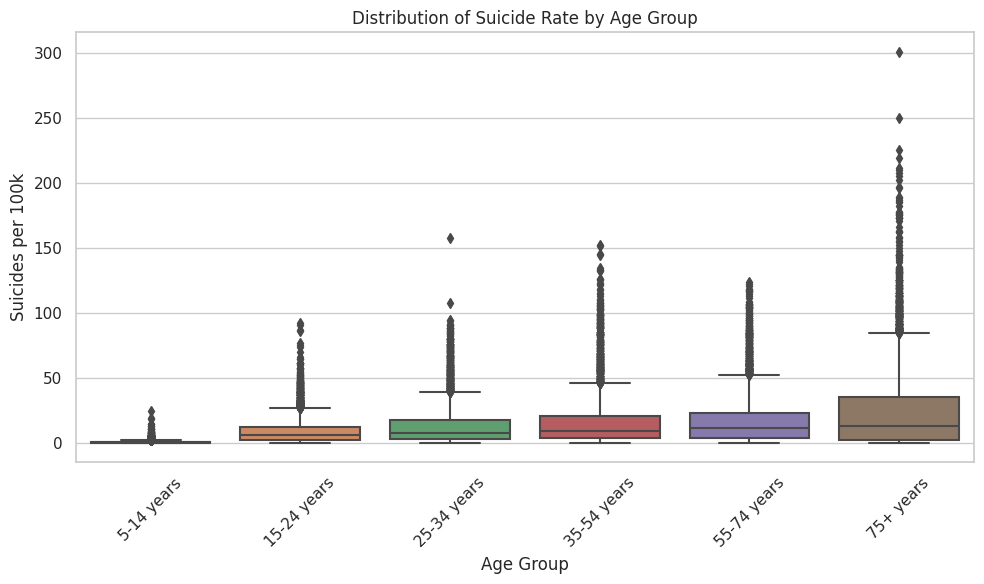

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x="age", y="suicide_rate_per_100k", order=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])
plt.title("Distribution of Suicide Rate by Age Group")
plt.ylabel("Suicides per 100k")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
corr = df_clean["suicide_rate_per_100k"].corr(df_clean["population"])
print(f"📊 Correlation between Suicide Rate and Population: {corr:.4f}")

📊 Correlation between Suicide Rate and Population: -0.0032


## 📊 Conclusion

This statistical analysis of WHO's global suicide dataset (1985–2015) reveals significant patterns and disparities:

- 🔹 **Gender Difference:** Male suicide rates are significantly higher than female rates (**T-test p < 0.0001**).
- 🔹 **Age Impact:** Suicide rates vary significantly by age group (**ANOVA p < 0.0001**), with higher rates in older populations (55+ years).
- 🔹 **Population Size Irrelevant:** No meaningful correlation exists between population size and suicide rate (**r ≈ -0.003**).
- 🔹 **Country Disparities:** A small number of countries account for a disproportionately large number of suicides.

---

## 📈 Key Visual Insights

- Time trends show relatively stable but high suicide rates over the years.
- Elderly males emerge as the most vulnerable demographic group globally.
- Suicide prevention programs need to be age- and gender-specific.

---

## 🔍 Future Work

- 📉 **Correlation with GDP:** Investigate how economic factors influence suicide rates.
- 🤖 **Predictive Modeling:** Use machine learning to predict suicide risk from demographic and economic features.
- 🌍 **Clustering:** Group countries by suicide patterns for targeted regional policy recommendations.
- 📅 **Time Series Forecasting:** Predict future suicide trends by country.

---

## 🙌 Final Note

This analysis highlights the urgent need for targeted mental health interventions, especially for older males and high-risk countries. As a biostatistician, such insights are vital to transforming raw data into real-world public health impact.